In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# data importation


In [2]:
data1 = pd.read_csv('Avg-Weekday-Rail-Ridership-by-Month-by-Station-by-Period-2010-to-2016.csv')



In [3]:
data1

,date_month_int,station_name,period,riders_per_weekday
0,201009,Addison Road,AM Peak,2303.7
1,201009,Addison Road,Evening,211.0
2,201009,Addison Road,Late Night Peak,5.1
3,201009,Addison Road,Midday,748.0
4,201009,Addison Road,PM Peak,399.6
...,...,...,...,...
28879,201602,Woodley Park-Zoo/Adams Morgan,AM Peak,2558.5
28880,201602,Woodley Park-Zoo/Adams Morgan,Evening,590.8
28881,201602,Woodley Park-Zoo/Adams Morgan,Late Night Peak,30.6
28882,201602,Woodley Park-Zoo/Adams Morgan,Midday,1367.9


# Data visualisation

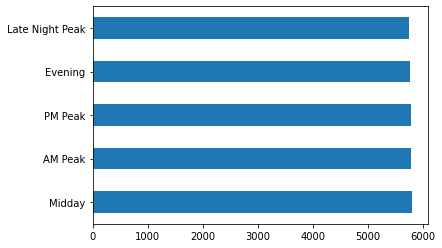

In [4]:
data1["period"].value_counts().plot(kind='barh')


our dataset is evenly distributed, so there is no problem at this stage. So we can continue.

In [5]:
data1["station_name"].value_counts()

Addison Road                  330
NoMa-Gallaudet U              330
Rosslyn                       330
Rockville                     330
Rhode Island Ave-Brentwood    330
                             ... 
Wiehle-Reston East            112
Tysons Corner                 109
McLean                        109
Greensboro                    105
Spring Hill                   105
Name: station_name, Length: 91, dtype: int64


We notice that there is a lack of information on some stations (more precisely 6 stations). We will see later will this problem affect our analysis and then our model


To better understand our dataset, we grouped the initial data by station then by period and we visualized the evolution of the number of passengers in each period during the weekends.

period
AM Peak            AxesSubplot(0.125,0.125;0.775x0.755)
Evening            AxesSubplot(0.125,0.125;0.775x0.755)
Late Night Peak    AxesSubplot(0.125,0.125;0.775x0.755)
Midday             AxesSubplot(0.125,0.125;0.775x0.755)
PM Peak            AxesSubplot(0.125,0.125;0.775x0.755)
Name: riders_per_weekday, dtype: object

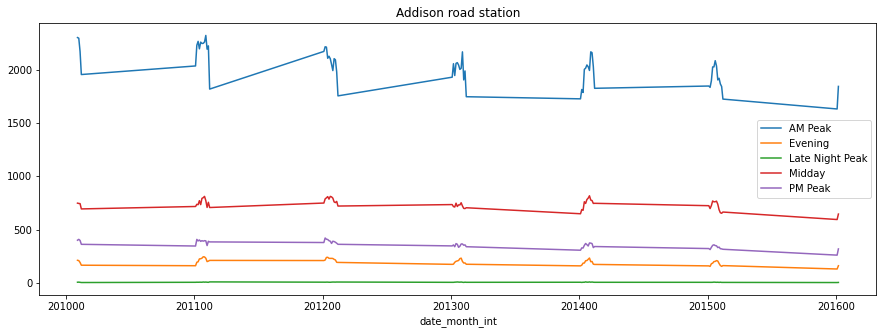

In [6]:
gk = data1.groupby('station_name')
gk1 = gk.get_group('Addison Road').set_index('date_month_int')
gk1.groupby("period")['riders_per_weekday'].plot(legend=True,title = 'Addison road station',figsize=(15,5))

period
AM Peak            AxesSubplot(0.125,0.125;0.775x0.755)
Evening            AxesSubplot(0.125,0.125;0.775x0.755)
Late Night Peak    AxesSubplot(0.125,0.125;0.775x0.755)
Midday             AxesSubplot(0.125,0.125;0.775x0.755)
PM Peak            AxesSubplot(0.125,0.125;0.775x0.755)
Name: riders_per_weekday, dtype: object

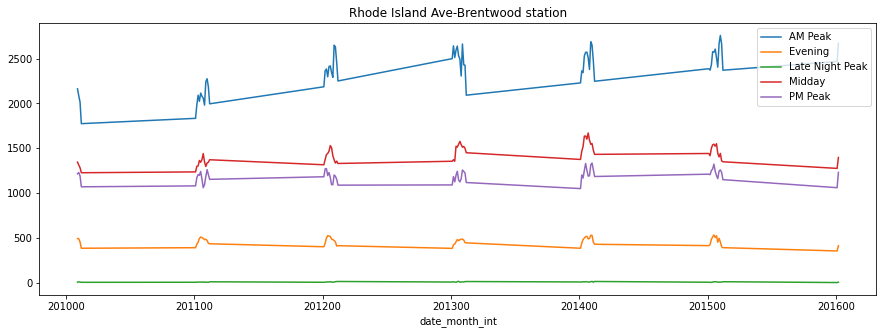

In [7]:
gk2 = gk.get_group('Rhode Island Ave-Brentwood').set_index('date_month_int')
gk2.groupby("period")['riders_per_weekday'].plot(legend=True,title = 'Rhode Island Ave-Brentwood station',figsize=(15,5))

period
AM Peak            AxesSubplot(0.125,0.125;0.775x0.755)
Evening            AxesSubplot(0.125,0.125;0.775x0.755)
Late Night Peak    AxesSubplot(0.125,0.125;0.775x0.755)
Midday             AxesSubplot(0.125,0.125;0.775x0.755)
PM Peak            AxesSubplot(0.125,0.125;0.775x0.755)
Name: riders_per_weekday, dtype: object

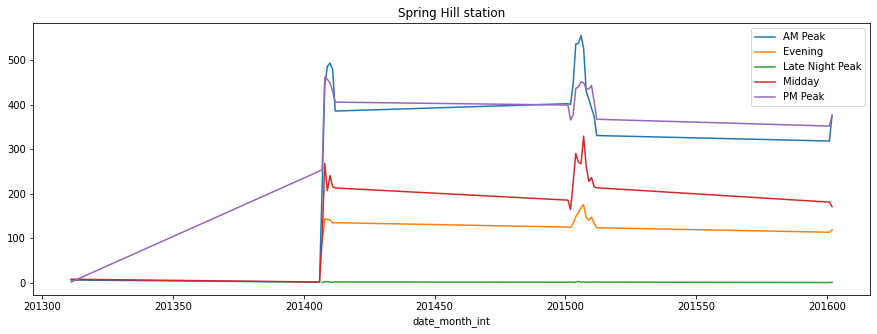

In [8]:
gk3 = gk.get_group('Spring Hill').set_index('date_month_int')
gk3.groupby("period")['riders_per_weekday'].plot(legend=True,title = 'Spring Hill station',figsize=(15,5))


We can notice that the shape of the curve of the different periods are similar and they are of a periodic character, so we can use the other periods to predict the other.

# Feature engineering

In [9]:
data1.head()

,date_month_int,station_name,period,riders_per_weekday
0,201009,Addison Road,AM Peak,2303.7
1,201009,Addison Road,Evening,211.0
2,201009,Addison Road,Late Night Peak,5.1
3,201009,Addison Road,Midday,748.0
4,201009,Addison Road,PM Peak,399.6


In [10]:
gk = data1.groupby(['station_name','date_month_int','period'])

In [11]:
gk = gk.sum()

In [12]:
data = gk.unstack(level=2).reset_index().rename_axis((None,None), axis=1)
data.columns = ['station_name','date_month_int']+[col[1] for col in data.columns[2:]] 

In [13]:
data

,station_name,date_month_int,AM Peak,Evening,Late Night Peak,Midday,PM Peak
0,Addison Road,201009,2303.7,211.0,5.1,748.0,399.6
1,Addison Road,201010,2298.0,208.2,5.9,745.2,407.8
2,Addison Road,201011,2173.5,190.7,4.2,743.6,397.7
3,Addison Road,201012,1956.5,164.9,2.3,693.8,361.2
4,Addison Road,201101,2037.1,160.1,4.4,716.6,345.2
...,...,...,...,...,...,...,...
5793,Woodley Park-Zoo/Adams Morgan,201510,2528.3,698.4,52.8,1453.4,1465.1
5794,Woodley Park-Zoo/Adams Morgan,201511,2314.5,588.1,46.4,1385.6,1399.6
5795,Woodley Park-Zoo/Adams Morgan,201512,1956.7,1008.5,60.1,1273.4,1196.9
5796,Woodley Park-Zoo/Adams Morgan,201601,2205.9,464.0,23.1,1182.3,992.7


# From Tabular data to graph


We have noticed missing values ​​which will therefore affect our model, we will delete them (another strategy is to try to replace it with existing values).


In [14]:
missing_station = ["Wiehle-Reston East","Tysons Corner","McLean","Greensboro","Spring Hill",'Arlington Cemetery']
for i in missing_station:
  data.drop(data[data["station_name"] == i ].index, inplace=True)


For this part, we didn’t find a good dataset. So we created one based on the metro map. Each color represents a line. The idea is that we will group the elements that belong to the same line in a sub-graph that is connected by the points of intersection with the sub-graphs of the other lines

In [15]:
data2 = pd.read_csv("stations.csv")
missing_station = ["Wiehle-Reston East","Tysons Corner","McLean","Greensboro","Spring Hill",'Arlington Cemetery']
for i in missing_station:
  data2.drop(data2[data2["Unnamed: 0"] == i ].index, inplace=True)

In [16]:
data2

,Unnamed: 0,latitude,longitude,Blue,Orange,Silver,Red,green,Yellow
0,Addison Road,38.886722,-76.894406,1,0,1,0,0,0
1,Anacostia,38.865442,-76.984253,0,0,0,0,1,0
2,Archives-Navy Memorial,38.893682,-77.021915,0,0,0,0,1,1
4,Ballston-MU,38.882006,-77.111514,0,1,1,0,0,0
5,Benning Road,38.890447,-76.937533,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
85,West Falls Church-VT/UVA,38.900793,-77.188965,0,1,0,0,0,0
86,West Hyattsville,38.955228,-76.969520,0,0,0,0,1,1
87,Wheaton,41.864696,-88.110171,0,0,0,1,0,0
88,White Flint,39.046129,-77.113010,0,0,0,1,0,0


Encode station names

In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data2["station_code"] = labelencoder.fit_transform(data2["Unnamed: 0"].sort_values())


Let's first identify the graph-specific things we need:


- `Nodes` - Stations names
- `Edges` - If the stations are related to the same metro line
- `Node Features` - AM Peak	Evening	Late Night Peak	Midday
- `Labels` - PM Peack
- `Timesteps` - 1 month Interval
- `Temporal graph shape` - static (Just the node Features are changing over time)




In [18]:
blue_line = data2.loc[(data2['Blue'] == 1)]["station_code"].value_counts().index.to_list()
Orange_line = data2.loc[(data2['Orange'] == 1)]["station_code"].value_counts().index.to_list()
Silver_line = data2.loc[(data2['Silver'] == 1)]["station_code"].value_counts().index.to_list()
Red_line = data2.loc[(data2['Red'] == 1)]["station_code"].value_counts().index.to_list()
green_line = data2.loc[(data2['green'] == 1)]["station_code"].value_counts().index.to_list()
Yellow_line = data2.loc[(data2['Yellow'] == 1)]["station_code"].value_counts().index.to_list()

In [19]:
data.sort_values(by = "date_month_int",inplace = True)
data.loc[(data["date_month_int"] == 201510)]

,station_name,date_month_int,AM Peak,Evening,Late Night Peak,Midday,PM Peak
5570,West Hyattsville,201510,2227.6,183.1,5.7,786.2,553.2
2857,King St-Old Town,201510,2947.5,933.9,22.3,1743.9,2676.8
3873,Pentagon City,201510,5252.4,1618.9,13.6,2944.4,3411.0
1843,Farragut West,201510,1433.3,3364.8,72.0,3326.5,12841.6
1777,Farragut North,201510,1202.9,3881.5,82.4,3674.5,15388.5
...,...,...,...,...,...,...,...
1315,Crystal City,201510,3898.3,906.3,23.0,2553.4,4706.0
853,Cheverly,201510,831.0,51.8,1.0,200.9,137.8
4005,Prince George's Plaza,201510,2306.0,438.8,12.2,1040.0,916.1
4951,Twinbrook,201510,2224.0,251.9,5.4,818.0,967.2


In [20]:
indexes = data["date_month_int"].value_counts().index.to_list()

In [21]:
import itertools

#build edges :


blue_line_edges = list(itertools.combinations(blue_line, 2))
Orange_line_edges = list(itertools.combinations(Orange_line, 2))
Silver_line_edges = list(itertools.combinations(Silver_line, 2))
Red_line_edges = list(itertools.combinations(Red_line, 2))
green_line_edges = list(itertools.combinations(green_line, 2))
Yellow_line_edges = list(itertools.combinations(Yellow_line, 2))

edges = blue_line_edges+Orange_line_edges+Silver_line_edges+Red_line_edges+green_line_edges+Yellow_line_edges
print(len(edges))
edges_source = [e[0] for e in edges]
edges_target = [e[1] for e in edges]
edges = np.column_stack([edges_source, edges_target])
all_edges = np.array([], dtype=np.int32).reshape((0, 2))
all_edges = np.vstack([all_edges, edges])
edge_index = all_edges.transpose()
edge_index

1674


array([[ 0,  0,  0, ..., 15, 15, 14],
       [ 4, 68, 66, ..., 14, 81, 81]])

Our graph network

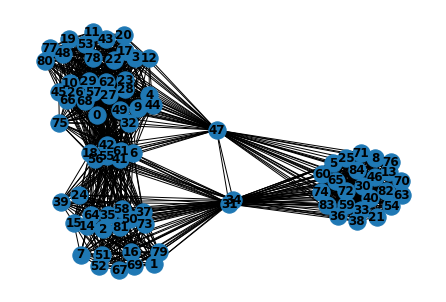

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_nodes_from(list(data2["station_code"].values))
G.add_edges_from(edges)
nx.draw(G, with_labels=True, font_weight="bold")
plt.show()

In [24]:


xs = []
edge_indices = []
ys = []
y_indices = []
edge_features = []

for i in range(len(indexes)):
  #node features
  current_snapshot = data.loc[(data["date_month_int"] == indexes[i])].sort_values(by = "station_name")
  
  xs.append(current_snapshot.drop(["date_month_int","PM Peak","station_name"],axis= 1).values)


  #edge:
  edge_indices.append(edge_index)
  #labels:
  y = current_snapshot["PM Peak"].values
  ys.append(y)
y

array([  318. ,  1750.7,  5222.6,  3527.4,   442.9,  3791. ,   856.8,
         380.8,  2056.2,   221.1,  3889.3,   130.4,   975. ,   608.6,
        1199. ,  3331.7,   425.8,  1944.8,  4828.2,   200.3,   743. ,
        7894. ,   545.1,  1425.1,   396.9, 16009.6, 13151.3,  3934.5,
        5431.2, 10406. ,   247.5,  1677.5,   771.2,  2703.2, 11490. ,
        1337.6,   500.5,   784.6,   673.1,   582.2,  5742.5,  2404.3,
       12631.9,   175.1,   451.3,  8692. ,  3364.2, 14064.8,   602.6,
         170.5,  1553.3,  3932.9,   305.5,   871.8,  4022.4,  6178.5,
        3226. ,   563.7,   885.4,  1232.2,   960.8,  1791. ,  5832. ,
        1333.2,  1614.1,  2993.3,  5152.5,   539.8,   531.6,   897.6,
         774.7,  2469.2,   983.1,  1880.5, 11604.6,   317.2,  1572.6,
        1069.5,   977.1,  1311.6,   241.6,   506. ,   600.7,  1154.8,
        1313.7])

In [25]:
i = 30
print(f"""Example of graph snapshot {i}: \n
      Node feature shape: {xs[i].shape} \n
      Edge index shape: {edge_indices[i].shape} \n
      Labels shape: {ys[i].shape} \n
      """)

Example of graph snapshot 30: 

      Node feature shape: (85, 4) 

      Edge index shape: (2, 1674) 

      Labels shape: (85,) 

      


In [26]:
!pip install torch_geometric_temporal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 3.6 MB/s 
     |████████████████████████████████| 51 kB 199 kB/s 
     |████████████████████████████████| 407 kB 18.3 MB/s 
  Created wheel for torch-geometric-temporal: filename=torch_geometric_temporal-0.53.0-py3-none-any.whl size=86611 sha256=8c7f546c2ed05437685ee64e23a2d1227b523bfc3fd49de200a4f77a91bf7afa
  Stored in directory: /root/.cache/pip/wheels/80/c0/94/f5588f117b0e45da9aa490613f7ed5b3905440dc6d28b5bf42
  Created wheel for torch-geometric: filename=torch_geometric-2.0.4-py3-none-any.whl size=616603 sha256=6bc71b72b576910e4c0c369bb892cac56bacaecd3a5a5a4d78b6572888f1dfda
  Stored in directory: /root/.cache/pip/wheels/18/a6/a4/ca18c3051fcead866fe7b85700ee2240d883562a1bc70ce421
  Created wheel for torch-scatter: filename=torch_scatter-2.0.9-cp37-cp37m-linux_x86_64.whl size=274491 sha256=f245cfe15c63bd26a8dd3a9c09318dcbd353c4fb17f062e58b

In [27]:
from torch_geometric_temporal.signal import StaticGraphTemporalSignal


In [28]:
dataset = StaticGraphTemporalSignal(edge_index = edge_index,edge_weight=None,features = xs,targets = ys)

In [29]:
dataset[1]

Data(x=[85, 4], edge_index=[2, 1674], y=[85])

In [30]:
print("Dataset type:  ", dataset)
print("Number of samples / sequences: ",  len(set(dataset)))

Dataset type:   <torch_geometric_temporal.signal.static_graph_temporal_signal.StaticGraphTemporalSignal object at 0x7fb8aaf78b90>
Number of samples / sequences:  66


# Implementing Models

Metrics

In [31]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 419 kB 6.1 MB/s 


In [32]:
from torchmetrics import MeanSquaredError,MeanAbsolutePercentageError,MeanAbsoluteError
import math
mean_absolute_error = MeanAbsoluteError()
mean_abs_percentage_error = MeanAbsolutePercentageError()
mean_squared_error = MeanSquaredError()


## Test/Train Split

In [33]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv


In [34]:
from torch_geometric_temporal.signal import temporal_signal_split
train_dataset, test_dataset = temporal_signal_split(dataset, train_ratio=0.85)

print("Number of train buckets: ", len(set(train_dataset)))
print("Number of test buckets: ", len(set(test_dataset)))

Number of train buckets:  56
Number of test buckets:  10


#GNN

In [35]:
from torch_geometric_temporal.nn.recurrent import DCRNN

In [36]:
class TemporalGNN(torch.nn.Module):
    def __init__(self, node_features, periods):
        super(TemporalGNN, self).__init__()
        # Attention Temporal Graph Convolutional Cell
        self.tgnn = DCRNN(node_features, 32, 1)
        # Equals single-shot prediction
        self.linear = torch.nn.Linear(32, periods)

    def forward(self, x, edge_index):
        """
        x = Node features for T time steps
        edge_index = Graph edge indices
        """
        h = self.tgnn(x, edge_index)
        h = F.relu(h)
        h = self.linear(h)
        return h


In [37]:
TemporalGNN(node_features=4, periods=10)

TemporalGNN(
  (tgnn): DCRNN(
    (conv_x_z): DConv(36, 32)
    (conv_x_r): DConv(36, 32)
    (conv_x_h): DConv(36, 32)
  )
  (linear): Linear(in_features=32, out_features=10, bias=True)
)

## Training

In [39]:
# GPU support
device = torch.device('cpu') # cuda
subset = 2000

# Create model and optimizers
model = TemporalGNN(node_features=4, periods=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
model.train()


print("Running training...")
for epoch in range(1000): 

    MSE = 0
    MAE = 0
    MAPE = 0

    step = 0
    for snapshot in train_dataset:
        snapshot = snapshot.to(device)
        # Get model predictions
        y_hat = model(snapshot.x, snapshot.edge_index)
        
        # Erreur
        
        MAE = MAE + mean_absolute_error(y_hat,snapshot.y.reshape(85,1)) 
        MSE = MSE + mean_squared_error(y_hat,snapshot.y.reshape(85,1))
        MAPE = MAPE + mean_abs_percentage_error(y_hat,snapshot.y.reshape(85,1)) 
        
        step += 1
        if step > subset:
          break

    MAE = MAE / (step + 1)
    MSE = MSE / (step + 1)
    MSE.backward()
    optimizer.step()
    optimizer.zero_grad()
    print("Epoch {} train \n\tMSE: {:.4f} \tRMSE : {:.4f} \tMAE : {:.4f} \tMAPE : {:.4f}".format(epoch, MSE.item(),math.sqrt(MSE.item()),MAE.item(),MAPE.item()))

Running training...
Epoch 0 train 
	MSE: 21127358.0000 	RMSE : 4596.4506 	MAE : 2871.2605 	MAPE : 55.9931
Epoch 1 train 
	MSE: 21124006.0000 	RMSE : 4596.0859 	MAE : 2870.7427 	MAPE : 55.9643
Epoch 2 train 
	MSE: 21122080.0000 	RMSE : 4595.8764 	MAE : 2870.4868 	MAPE : 55.9490
Epoch 3 train 
	MSE: 21121476.0000 	RMSE : 4595.8107 	MAE : 2870.3794 	MAPE : 55.9418
Epoch 4 train 
	MSE: 21120932.0000 	RMSE : 4595.7515 	MAE : 2870.2852 	MAPE : 55.9359
Epoch 5 train 
	MSE: 21120368.0000 	RMSE : 4595.6902 	MAE : 2870.1885 	MAPE : 55.9299
Epoch 6 train 
	MSE: 21119802.0000 	RMSE : 4595.6286 	MAE : 2870.0930 	MAPE : 55.9238
Epoch 7 train 
	MSE: 21119234.0000 	RMSE : 4595.5668 	MAE : 2869.9956 	MAPE : 55.9176
Epoch 8 train 
	MSE: 21118660.0000 	RMSE : 4595.5043 	MAE : 2869.8967 	MAPE : 55.9114
Epoch 9 train 
	MSE: 21118082.0000 	RMSE : 4595.4414 	MAE : 2869.7983 	MAPE : 55.9052
Epoch 10 train 
	MSE: 21117508.0000 	RMSE : 4595.3790 	MAE : 2869.7002 	MAPE : 55.8989
Epoch 11 train 
	MSE: 21116926.00

### Evaluation

- Lets get some sample predictions for a specific horizon 
- The model always gets one month weekends PM peak and needs to predict it for the next month

In [49]:
model.eval()
loss = 0
step = 0
horizon = 288

# Store for analysis
predictions = []
labels = []

for snapshot in test_dataset:
    snapshot = snapshot.to(device)
    # Get predictions
    y_hat = model(snapshot.x, snapshot.edge_index)
    # Mean squared error
    # Erreur
        
    MAE = MAE + mean_absolute_error(y_hat,snapshot.y.reshape(85,1)) 
    MSE = MSE + mean_squared_error(y_hat,snapshot.y.reshape(85,1))
    MAPE = MAPE + mean_abs_percentage_error(y_hat,snapshot.y.reshape(85,1)) 
        
      
    
    # Store for analysis below
    labels.append(snapshot.y)
    predictions.append(y_hat)
    step += 1
    if step > horizon:
          break

MAE = MAE / (step + 1)
MSE = MSE / (step + 1)
print("Test \n\tMSE: {:.4f} \tRMSE : {:.4f} \tMAE : {:.4f} \tMAPE : {:.4f}".format(epoch, MSE.item(),math.sqrt(MSE.item()),MAE.item(),MAPE.item()))

Test 
	MSE: 999.0000 	RMSE : 20648856.0000 	MAE : 4544.1012 	MAPE : 2801.2197


## GCN

In [41]:
from torch_geometric_temporal.nn.recurrent import TGCN

In [42]:
class TemporalGCN(torch.nn.Module):
    def __init__(self, node_features, periods):
        super(TemporalGCN, self).__init__()
        # Attention Temporal Graph Convolutional Cell
        self.tgnn = TGCN(node_features, 32, 1)
        # Equals single-shot prediction
        self.linear = torch.nn.Linear(32, periods)

    def forward(self, x, edge_index):
        """
        x = Node features for T time steps
        edge_index = Graph edge indices
        """
        h = self.tgnn(x, edge_index)
        h = F.relu(h)
        h = self.linear(h)
        return h

In [43]:
TemporalGCN(node_features=4, periods=10)

TemporalGCN(
  (tgnn): TGCN(
    (conv_z): GCNConv(4, 32)
    (linear_z): Linear(in_features=64, out_features=32, bias=True)
    (conv_r): GCNConv(4, 32)
    (linear_r): Linear(in_features=64, out_features=32, bias=True)
    (conv_h): GCNConv(4, 32)
    (linear_h): Linear(in_features=64, out_features=32, bias=True)
  )
  (linear): Linear(in_features=32, out_features=10, bias=True)
)

### Training

In [48]:
# GPU support
device = torch.device('cpu') # cuda
subset = 2000

# Create model and optimizers
model = TemporalGCN(node_features=4, periods=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
model.train()


print("Running training...")
for epoch in range(1000): 

    MSE = 0
    MAE = 0
    MAPE = 0

    step = 0
    for snapshot in train_dataset:
        snapshot = snapshot.to(device)
        # Get model predictions
        y_hat = model(snapshot.x, snapshot.edge_index)
        
        # Erreur
        
        MAE = MAE + mean_absolute_error(y_hat,snapshot.y.reshape(85,1)) 
        MSE = MSE + mean_squared_error(y_hat,snapshot.y.reshape(85,1))
        MAPE = MAPE + mean_abs_percentage_error(y_hat,snapshot.y.reshape(85,1)) 
        
        step += 1
        if step > subset:
          break

    MAE = MAE / (step + 1)
    MSE = MSE / (step + 1)
    MSE.backward()
    optimizer.step()
    optimizer.zero_grad()
    print("Epoch {} train \n\tMSE: {:.4f} \tRMSE : {:.4f} \tMAE : {:.4f} \tMAPE : {:.4f}".format(epoch, MSE.item(),math.sqrt(MSE.item()),MAE.item(),MAPE.item()))

Running training...
Epoch 0 train 
	MSE: 21128386.0000 	RMSE : 4596.5624 	MAE : 2871.5784 	MAPE : 56.0183
Epoch 1 train 
	MSE: 21126106.0000 	RMSE : 4596.3144 	MAE : 2871.1667 	MAPE : 55.9914
Epoch 2 train 
	MSE: 21125186.0000 	RMSE : 4596.2143 	MAE : 2871.0132 	MAPE : 55.9819
Epoch 3 train 
	MSE: 21124484.0000 	RMSE : 4596.1379 	MAE : 2870.8909 	MAPE : 55.9740
Epoch 4 train 
	MSE: 21123790.0000 	RMSE : 4596.0624 	MAE : 2870.7759 	MAPE : 55.9669
Epoch 5 train 
	MSE: 21123222.0000 	RMSE : 4596.0007 	MAE : 2870.6780 	MAPE : 55.9607
Epoch 6 train 
	MSE: 21122650.0000 	RMSE : 4595.9384 	MAE : 2870.5801 	MAPE : 55.9546
Epoch 7 train 
	MSE: 21122078.0000 	RMSE : 4595.8762 	MAE : 2870.4817 	MAPE : 55.9484
Epoch 8 train 
	MSE: 21121502.0000 	RMSE : 4595.8135 	MAE : 2870.3843 	MAPE : 55.9421
Epoch 9 train 
	MSE: 21120932.0000 	RMSE : 4595.7515 	MAE : 2870.2856 	MAPE : 55.9360
Epoch 10 train 
	MSE: 21120354.0000 	RMSE : 4595.6886 	MAE : 2870.1875 	MAPE : 55.9297
Epoch 11 train 
	MSE: 21119780.00

### Evaluation

In [50]:
model.eval()
loss = 0
step = 0
horizon = 288

# Store for analysis
predictions = []
labels = []

for snapshot in test_dataset:
    snapshot = snapshot.to(device)
    # Get predictions
    y_hat = model(snapshot.x, snapshot.edge_index)
    # Mean squared error
    # Erreur
        
    MAE = MAE + mean_absolute_error(y_hat,snapshot.y.reshape(85,1)) 
    MSE = MSE + mean_squared_error(y_hat,snapshot.y.reshape(85,1))
    MAPE = MAPE + mean_abs_percentage_error(y_hat,snapshot.y.reshape(85,1)) 
        
      
    
    # Store for analysis below
    labels.append(snapshot.y)
    predictions.append(y_hat)
    step += 1
    if step > horizon:
          break

MAE = MAE / (step + 1)
MSE = MSE / (step + 1)
print("Test {} train \n\tMSE: {:.4f} \tRMSE : {:.4f} \tMAE : {:.4f} \tMAPE : {:.4f}".format(epoch, MSE.item(),math.sqrt(MSE.item()),MAE.item(),MAPE.item()))

Test 999 train 
	MSE: 20656376.0000 	RMSE : 4544.9286 	MAE : 2803.7205 	MAPE : 67.6248
